<a href="https://colab.research.google.com/github/RaswanthMurugan20/ML4SCI/blob/main/Quantum_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cirq
!pip install cirq-core[contrib]
!python -c 'import cirq_google; print(cirq_google.Foxtail)'
!pip install tensorflow-quantum
!wget https://github.com/ML4SCI/ML4SCI_GSoC/raw/main/QMLHEP/qcnn/electron-photon.npz

     |████████████████████████████████| 541 kB 13.5 MB/s 
     |████████████████████████████████| 1.8 MB 51.4 MB/s 
     |████████████████████████████████| 593 kB 65.8 MB/s 
     |████████████████████████████████| 48 kB 6.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 145 kB 56.4 MB/s 
     |████████████████████████████████| 97 kB 6.9 MB/s 
     |████████████████████████████████| 220 kB 54.7 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 10.1 MB 44.5 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 229 kB 73.8 MB/s 
     |████████████████████████████████| 44 kB 2.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 243 kB 62.7 MB/s 
     |███████████████████████

     |████████████████████████████████| 3.3 MB 25.2 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 216 kB 44.6 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
     |████████████████████████████████| 481 kB 54.7 MB/s 
  Created wheel for pylatex: filename=PyLaTeX-1.3.4-py3-none-any.whl size=42268 sha256=7516f8fab3abe146a797e1ac12c324731412a3ac2aa14752740238c7f59e074b
  Stored in directory: /root/.cache/pip/wheels/3a/df/ef/54d80a4c785804c24915fa601bfd421421757e511941bdcf14
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230838 sha256=54680590884dd04a3e00d7a47a8e0c9a69428154274716811f2450e3a1367cde
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
Successfully built pylatex cytoolz
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Unin

In [ ]:
import cirq
import numpy as np 
from matplotlib import pyplot as plt

##**Task I: Quantum Computing Part**


###1)

In [ ]:
q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

In [ ]:
h_q0, h_q1, h_q2, h_q3, h_q4 = cirq.H(q0), cirq.H(q1) ,cirq.H(q2), cirq.H(q3), cirq.H(q4)

In [ ]:
cnot_01 = cirq.CNOT(q0, q1)
cnot_12 = cirq.CNOT(q1, q2)
cnot_23 = cirq.CNOT(q2, q3)
cnot_34 = cirq.CNOT(q3, q4)

In [ ]:
swap_04 = cirq.SWAP(q0, q4)

In [ ]:
rotation = cirq.rx(np.pi/2).on(q0)

In [ ]:
circuit = cirq.Circuit()
circuit.append([h_q0, h_q1, h_q2, h_q3, h_q4])
circuit.append([cnot_01, cnot_12, cnot_23, cnot_34])
circuit.append([swap_04])
circuit.append([rotation])
print(circuit)

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────


###2)

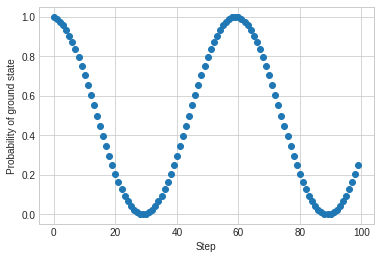

In [ ]:
a = cirq.NamedQubit('a')
simulator = cirq.Simulator()
num_angles = 100
circuit = cirq.Circuit([cirq.Rx(rads=np.pi / 30.0)(a) for theta in range(num_angles)])

# List to store probabilities of the ground state.
probs = []

# Step through the simulation results.
for step in simulator.simulate_moment_steps(circuit):
    prob = np.abs(step.state_vector()) ** 2
    probs.append(prob[0])

plt.plot(probs, 'o')
plt.xlabel("Step")
plt.ylabel("Probability of ground state");